# Assignment 2
## Nitin Nandeshwar
## R00183235
## 16/04/2020

In [138]:
from google.colab import files
uploaded = files.upload()

Saving Electric_Grid_Stability.csv to Electric_Grid_Stability (4).csv


In [139]:
# checking the file delimiter format
print (uploaded['Electric_Grid_Stability.csv'][:200].decode('utf-8') + '...')

"tau1","tau2","tau3","tau4","p1","p2","p3","p4","g1","g2","g3","g4","stab","stabf"
2.95906002455997,3.07988520422811,8.38102539191882,9.78075443222607,3.76308477206316,-0.782603630987543,-1.257394829...


# 1.Importing necessary libraries

In [0]:
import numpy as np 
import pandas as pd 
import io

import matplotlib.pyplot as plt
import seaborn as sns

# 2.Loading data

In [0]:
# loading the file in data frame
df= pd.read_csv(io.StringIO(uploaded['Electric_Grid_Stability.csv'].decode('utf-8')))

In [142]:
# Structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


# 3.Data Preprocessing

* 3.1 Checking for duplicates

In [143]:
print('Number of duplicates in dataset : ',sum(df.duplicated()))

Number of duplicates in dataset :  0


* 3.2 Checking for missing values

In [144]:
print('Total number of missing values in dataset : ', df.isna().values.sum())

Total number of missing values in dataset :  0


In [145]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [146]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.0

* 3.3 Checking for class imbalance

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

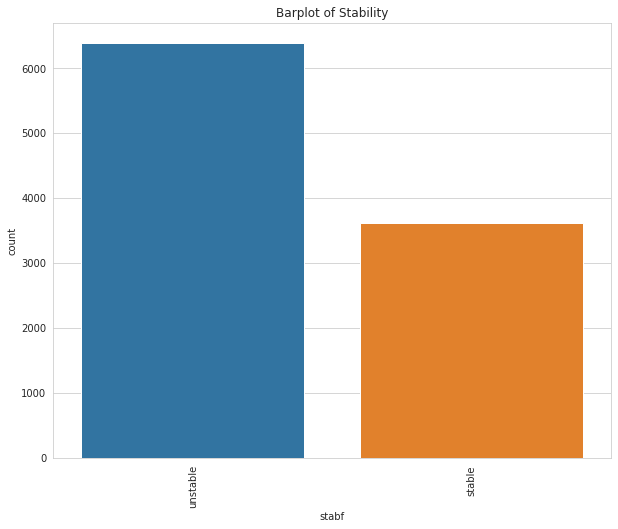

In [147]:
# Barplot of Categorical variable stabf
plt.figure(figsize=(10,8))
plt.title('Barplot of Stability')
sns.countplot(df['stabf'])
plt.xticks(rotation=90)

In [148]:
# Distribution of factors in variable stabf
print('No Stability', round(df['stabf'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Stability', round(df['stabf'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Stability 63.8 % of the dataset
Stability 36.2 % of the dataset


As we can see the data is not balanced it will affect the predicting model accuracy.

# 4.Exploratory Data Analysis

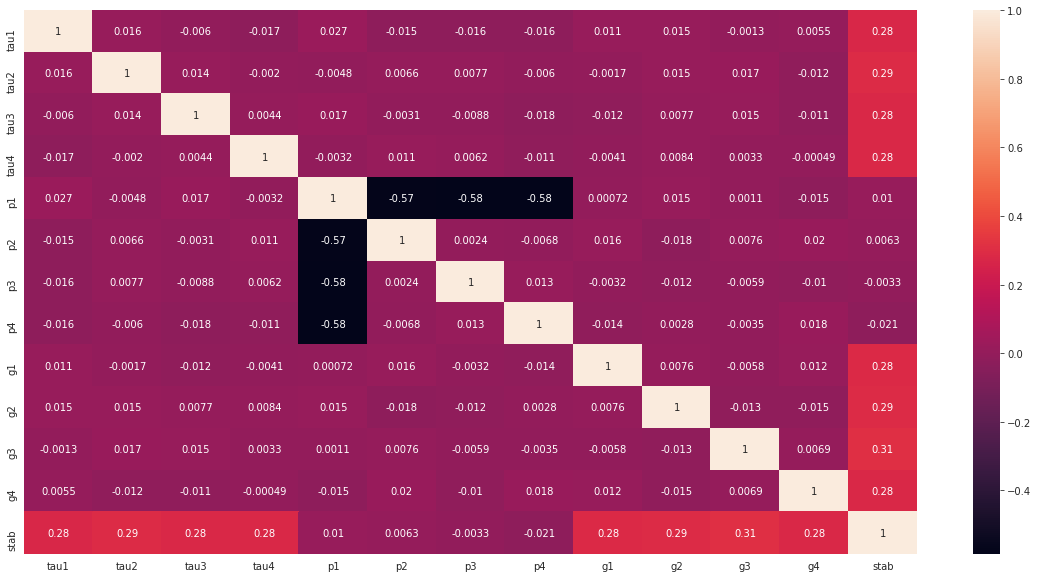

In [149]:
# Correlation plot of all varaibles in Dataset
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

**Explanation**

So we can see that there is some relationship between “stab” ,” 'tau1' to 'tau4'”and” 'g1' to 'g4'”.variables 'p1' to 'p4' have high collinearity between them but they have very low correlation with “stab”. So the variable 'p1' to 'p4' will not effect the prediction of classification variable “stabf”.

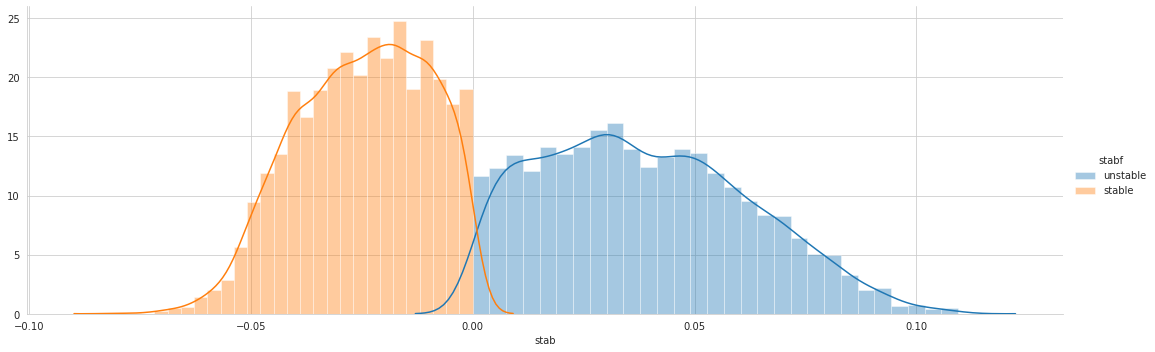

In [150]:
# Histogram of variable stabf with factors
facetgrid = sns.FacetGrid(df, hue='stabf', height=5,aspect=3)
facetgrid.map(sns.distplot,'stab', hist=True).add_legend()


**Explanation**

As we can see  it is some region in factors distribution where both stable and unstable factor share which makes the operator difficult to differentiate between the stability and unstability of electric grid.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

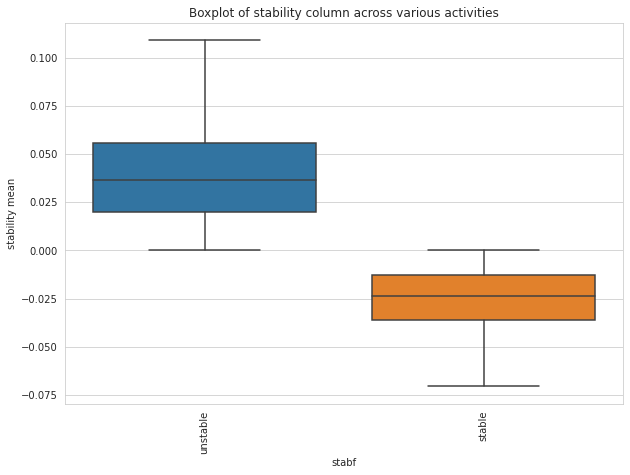

In [151]:
plt.figure(figsize=(10,7))
sns.boxplot(x='stabf', y='stab',data=df, showfliers=False)
plt.ylabel('stability mean')
plt.title("Boxplot of stability column across various activities")
plt.xticks(rotation=90)

As we can see the median is not same for both stability factor for differential equation root "stab".So their is some information pattern exsist betweendifferential equation root and stability factor.

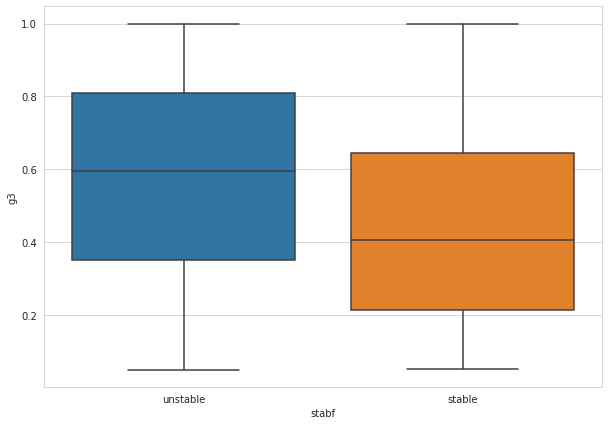

In [152]:
# Boxplot of ge vs stabf variable
plt.figure(figsize=(10,7))
sns.boxplot(x='stabf', y="g3",data=df, showfliers=False)

As we can see the median is not same for both stability factor for price elasticity coefficient "g3".So their is some information pattern exsist between price elasticity coefficient and stability factor.

# 5.ML models

* 5.1 Defining the train and target

In [0]:
X=df.drop(['stabf'],axis=1)
y=df['stabf']

In [0]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [155]:
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)


Training data size :  (8000, 13)
Test data size :  (2000, 13)


In [156]:
# Data balance
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label 'stable': {}".format(sum(y_train=="stable")))
print("Before OverSampling, counts of label 'unstable': {} \n".format(sum(y_train=="unstable")))

# SMOTE function for balaning the categorical data 
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label 'stable': {}".format(sum(y_train_res=="stable")))
print("After OverSampling, counts of label 'unstable': {}".format(sum(y_train_res=="unstable")))

Before OverSampling, counts of label 'stable': 2893
Before OverSampling, counts of label 'unstable': 5107 

After OverSampling, the shape of train_X: (10214, 13)
After OverSampling, the shape of train_y: (10214,) 

After OverSampling, counts of label 'stable': 5107
After OverSampling, counts of label 'unstable': 5107


* 5.2 **Logistic regression model** with Hyperparameter tuning and cross validation

In [0]:
from sklearn. linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [0]:
parameters = {'C':np.arange(10,61,10), 'penalty':['l2','l1']}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=10,random_state = 42)
lr_classifier_rs.fit(X_train_res, y_train_res)

# Data Imbalance
lr_classifier_rs1 = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=10,random_state = 42)
lr_classifier_rs1.fit(X_train, y_train)

y_pred = lr_classifier_rs.predict(X_test)

y_pred1 = lr_classifier_rs1.predict(X_test)

In [159]:
# Imbalance  Data
lr_accuracy1 = accuracy_score(y_true=y_test, y_pred=y_pred1)
print("Data Imbalance result ")
print("Accuracy using Logistic Regression : ", lr_accuracy1)
cm = confusion_matrix(y_test.values,y_pred1)
print("Confusion Matrix:")
print(cm)
TP =cm[0][0]
TN =cm[1][1]
FN = cm[1][0]
FP = cm[0][1] 

precision=TP/(TP+FP)
recall= TP/(TP+FN)
F1=(2*precision*recall)/(precision+recall)
print("precision:",precision)
print("Recall:",recall)
print("F1_score:",F1)

Data Imbalance result 
Accuracy using Logistic Regression :  0.9875
Confusion Matrix:
[[ 711   16]
 [   9 1264]]
precision: 0.9779917469050894
Recall: 0.9875
F1_score: 0.9827228749136144


In [160]:
# Balance data
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Balance data")
print("Accuracy using Logistic Regression : ", lr_accuracy)
cm = confusion_matrix(y_test.values,y_pred)
print("Confusion Matrix:")
print(cm)
TP =cm[0][0]
TN =cm[1][1]
FN = cm[1][0]
FP = cm[0][1] 

precision=TP/(TP+FP)
recall= TP/(TP+FN)
F1=(2*precision*recall)/(precision+recall)
print("precision:",precision)
print("Recall:",recall)
print("F1_score:",F1)

Balance data
Accuracy using Logistic Regression :  0.9875
Confusion Matrix:
[[ 720    7]
 [  18 1255]]
precision: 0.9903713892709766
Recall: 0.975609756097561
F1_score: 0.9829351535836178


In [0]:
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

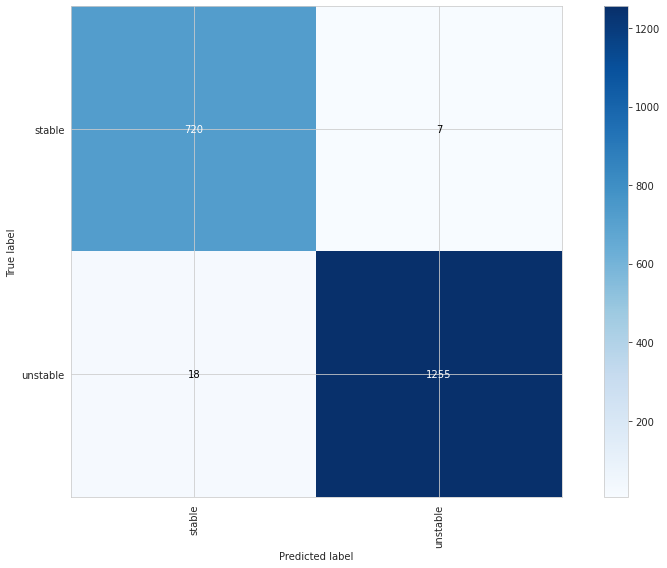

In [162]:
plot_confusion_matrix(cm, np.unique(y_pred))

In [0]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

In [164]:
# getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(C=60, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best set of parameters :  {'penalty': 'l2', 'C': 60}
Best score :  0.9917763176809504


* 5.3  **Decision tree model** with Hyperparameter tuning and cross validation

In [0]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs.fit(X_train_res, y_train_res)

# Data Imbalance
dt_classifier_rs1 = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs1.fit(X_train, y_train)

y_pred = dt_classifier_rs.predict(X_test)
# Data Imbalance prediction
y_pred1 = dt_classifier_rs1.predict(X_test)

In [166]:
# Data Imbalance 
dt_accuracy1 = accuracy_score(y_true=y_test, y_pred=y_pred1)
print("Data Imbalance result ")
print("Accuracy using Decision tree : ", dt_accuracy1)
cm = confusion_matrix(y_test.values,y_pred1)
print("Confusion Matrix:")
print(cm)
TP =cm[0][0]
TN =cm[1][1]
FN = cm[1][0]
FP = cm[0][1] 

precision=TP/(TP+FP)
recall= TP/(TP+FN)
F1=(2*precision*recall)/(precision+recall)
print("precision:",precision)
print("Recall:",recall)
print("F1_score:",F1)

Data Imbalance result 
Accuracy using Decision tree :  0.9995
Confusion Matrix:
[[ 727    0]
 [   1 1272]]
precision: 1.0
Recall: 0.9986263736263736
F1_score: 0.9993127147766323


In [167]:
# Balance data
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Balance Data")
print("Accuracy using Decision tree : ", dt_accuracy)
cm = confusion_matrix(y_test.values,y_pred)
print("Confusion Matrix:")
print(cm)
TP =cm[0][0]
TN =cm[1][1]
FN = cm[1][0]
FP = cm[0][1] 

precision=TP/(TP+FP)
recall= TP/(TP+FN)
F1=(2*precision*recall)/(precision+recall)
print("precision:",precision)
print("Recall:",recall)
print("F1_score:",F1)

Balance Data
Accuracy using Decision tree :  0.9995
Confusion Matrix:
[[ 727    0]
 [   1 1272]]
precision: 1.0
Recall: 0.9986263736263736
F1_score: 0.9993127147766323


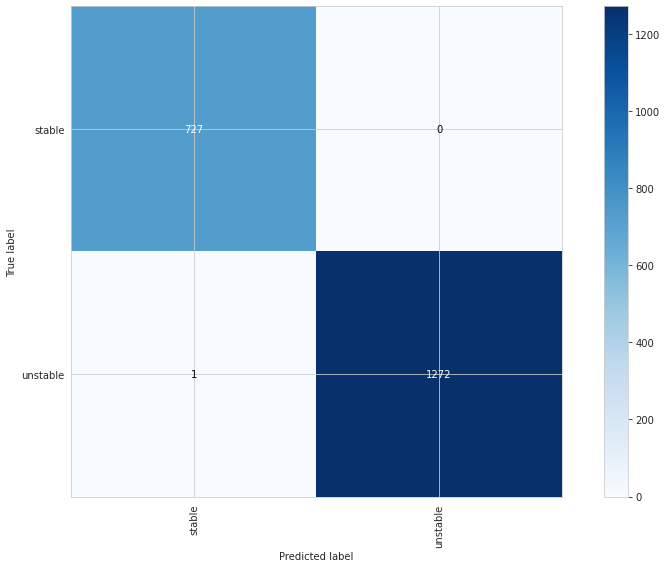

In [168]:
plot_confusion_matrix(cm, np.unique(y_pred))

In [169]:
# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best set of parameters :  {'max_depth': 2}
Best score :  0.9998042094958395


* 5.4 **Linear SVM model** with Hyperparameter tuning and cross validation

In [0]:
from sklearn.svm import LinearSVC

In [0]:
parameters = {'C':np.arange(1,12,2)}
lr_svm = LinearSVC(tol=0.00005)
lr_svm_rs = RandomizedSearchCV(lr_svm, param_distributions=parameters,random_state = 42)
lr_svm_rs.fit(X_train_res, y_train_res)

# Data Imbalance
lr_svm_rs1 = RandomizedSearchCV(lr_svm, param_distributions=parameters,random_state = 42)
lr_svm_rs1.fit(X_train, y_train)

y_pred = lr_svm_rs.predict(X_test)
# Data Imbalance prediction
y_pred1 = lr_svm_rs1.predict(X_test)

In [172]:
# Data Imbalance
lr_svm_accuracy1 = accuracy_score(y_true=y_test, y_pred=y_pred1)
print("# Data Imbalance")
print("Accuracy using linear SVM : ",lr_svm_accuracy1)
cm = confusion_matrix(y_test.values,y_pred1)
print("Confusion Matrix:")
print(cm)
TP =cm[0][0]
TN =cm[1][1]
FN = cm[1][0]
FP = cm[0][1] 

precision=TP/(TP+FP)
recall= TP/(TP+FN)
F1=(2*precision*recall)/(precision+recall)
print("precision:",precision)
print("Recall:",recall)
print("F1_score:",F1)

# Data Imbalance
Accuracy using linear SVM :  0.9865
Confusion Matrix:
[[ 708   19]
 [   8 1265]]
precision: 0.9738651994497937
Recall: 0.9888268156424581
F1_score: 0.9812889812889813


In [173]:
# Balance data
lr_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Balance Data")
print("Accuracy using linear SVM : ",lr_svm_accuracy)
cm = confusion_matrix(y_test.values,y_pred)
print("Confusion Matrix:")
print(cm)
TP =cm[0][0]
TN =cm[1][1]
FN = cm[1][0]
FP = cm[0][1] 

precision=TP/(TP+FP)
recall= TP/(TP+FN)
F1=(2*precision*recall)/(precision+recall)
print("precision:",precision)
print("Recall:",recall)
print("F1_score:",F1)

Balance Data
Accuracy using linear SVM :  0.974
Confusion Matrix:
[[ 722    5]
 [  47 1226]]
precision: 0.9931224209078404
Recall: 0.9388816644993498
F1_score: 0.9652406417112299


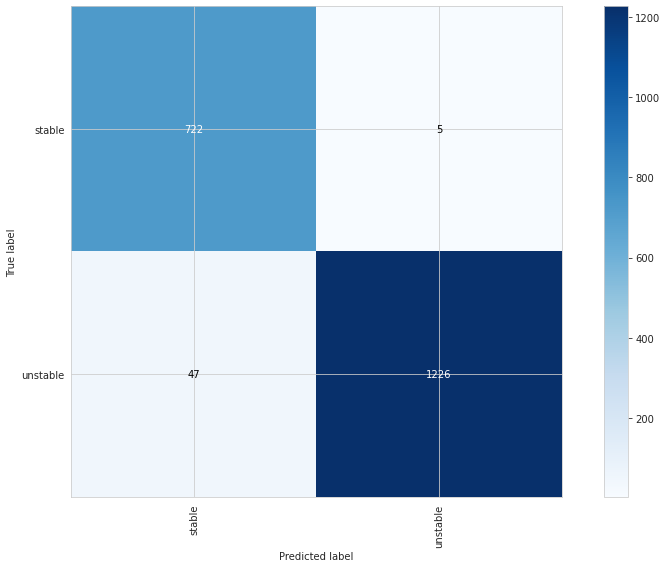

In [174]:
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [175]:
# getting best random search attributes
get_best_randomsearch_results(lr_svm_rs)

Best estimator :  LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)
Best set of parameters :  {'C': 1}
Best score :  0.9781679685009322
